# Digital Library

In [1]:
import subprocess
import os
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain_community.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
import chromadb

In [2]:
docsPath='/nfs/turbo/umms-indikar/shared/projects/RAG/papers/DigitalLibrary-9-June-2024/'
dbName='DigitalLibrary'
dbPath='/nfs/turbo/umms-indikar/shared/projects/RAG/databases/DigitalLibrary-10-June-2024/'
HuggingFaceEmbeddingsModel = 'BAAI/bge-base-en-v1.5'
chunk_size=[1000]
chunck_overlap=[50]
v=True

In [3]:
local = os.getcwd()  ## Get local dir
os.chdir(local)      ## shift the work dir to local dir

print('\nWork Directory: {}'.format(local)) if v else None

#%% Phase 1 - Load DB
embeddings_model = HuggingFaceEmbeddings(model_name=HuggingFaceEmbeddingsModel)

print('\nDocuments loading from:', docsPath) if v else None

text_loader_kwargs={'autodetect_encoding': True}


Work Directory: /home/jpic/RAG-DEV/experimental


/home/jpic/.local/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/home/jpic/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Documents loading from: /nfs/turbo/umms-indikar/shared/projects/RAG/papers/DigitalLibrary-9-June-2024/


In [4]:
loader = DirectoryLoader(docsPath,
                         glob="**/*.pdf",
                         loader_cls=PyPDFLoader, 
                         #loader_kwargs=text_loader_kwargs,
                         show_progress=True,
                         )
docs_data = loader.load()

  0%|          | 2/520 [00:01<05:37,  1.53it/s]Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 39 0 (offset 0)
Ignoring wrong pointing object 45 0 (offset 0)
 31%|███       | 161/520 [09:58<20:23,  3.41s/it]  Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)
Ignoring wrong pointing object 55 0 (offset 0)
Ignoring wrong pointing object 98 0 (offset 0)
Ignoring wrong pointing object 134 0 (offset 0)
Ignoring wrong pointing object 147 0 (offset 0)
Ignoring wrong pointing object 149 0 (offset 0)
Ignoring wrong pointing object 164 0 (offset 0)
Ignoring wrong pointing object 186 0 (offset 0)
Ignoring wrong pointing object 188 0 (offset 0)
Ignoring wrong pointing object 197 0 (offset 0)
 86%|████████▌ | 445/520 [21:58<02:10,  1.74s/it]  Ignoring wrong pointing object 2 65536 (offset 0)
Ignoring wrong pointing object 14 65536 (offset 0)
Ignoring wrong pointing object 35 65536 (offset 0)
Ignoring wrong pointing object 55 

In [ ]:
chunk_size = [1000] #Chunk size 
chunk_overlap = [50] #Chunk overlap
for i in range(len(chunk_size)):
    for j in range(len(chunk_overlap)):
        text_splitter = RecursiveCharacterTextSplitter(chunk_size = chunk_size[i],
                                                        chunk_overlap = chunk_overlap[j],
                                                        separators=[" ", ",", "\n", ". "])
        
        data_splits = text_splitter.split_documents(docs_data)
        print('Split Documents: ' + str(len(data_splits)))

        p2_2 = subprocess.run('mkdir  %s/*'%(dbPath+dbName), shell=True)
        _client_settings = chromadb.PersistentClient(path=(dbPath+dbName))

        print('Beginning Chrom Call')
        vectordb = Chroma.from_documents(documents           = data_splits,
                                         embedding           = embeddings_model,
                                         client              = _client_settings,
                                         collection_name     = dbName,
                                         collection_metadata = {"hnsw:space": "cosine"})

        print('Completed Chroma Database: ', dbName) if v else None

Split Documents: 62202


mkdir: cannot create directory ‘/nfs/turbo/umms-indikar/shared/projects/RAG/databases/DigitalLibrary-10-June-2024/DigitalLibrary/*’: No such file or directory


Beginning Chrom Call


# Load the Database

In [37]:
persist_directory = '/nfs/turbo/umms-indikar/shared/projects/RAG/databases/DigitalLibrary-10-June-2024/'
embeddings_model = HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5')        # Embedding model
db_name = "DigitalLibrary"
_client_settings = chromadb.PersistentClient(path=(persist_directory + db_name))
vectordb = Chroma(persist_directory=persist_directory,
                  embedding_function=embeddings_model,
                  client=_client_settings,
                  collection_name=db_name)

/home/jpic/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


# Analysis

In [18]:
import numpy as np
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
dbDict = vectordb.get(include=['embeddings'])

In [9]:
dbDict.keys()

dict_keys(['ids', 'embeddings', 'metadatas', 'documents', 'uris', 'data'])

In [ ]:
docs = dbDict['documents']

In [41]:
docs

[(Document(page_content='without transitioning through an intermediate pluripotent \nor multi  potent state\n3, has been described as ‘direct  \nreprogramming’ , also known as ‘transdifferentiation’ .\nIn addition to increasing our understanding of cell \nfate specification and plasticity, direct reprogramming \nholds promises for regenerative medicine. Compared to induced pluripotent stem cell (iPSC) reprogramming \n(not the focus of this review, reviewed in \nrefs4–7), direct \nreprogramming is a faster and more efficient process and has unique advantages for tissue repair \n(fig.\xa0 1). Whereas \nthe use of iPSCs6 requires the isolation of somatic cells \nand their reprogramming to a pluripotent state fol-lowed by their differentiation into a different lineage,  in principle, direct reprogramming enables the con-\nversion of cells in\xa0situ (in the desired tissue) without \ntransitioning through an intermediate pluripotent state \nand without the need for ex vivo cell expansion an

In [15]:
embds = dbDict['embeddings']

In [20]:
embds = np.array(embds)

In [21]:
embds.shape

(62202, 768)

In [22]:
del dbDict, vectordb

In [24]:
reducer = umap.UMAP(n_components=2, random_state=2)
embedding = reducer.fit_transform(embds)

/home/jpic/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [25]:
print(embedding.shape)

(62202, 2)


In [28]:
udf = pd.DataFrame()           # save umap results to a dataframe
udf['UMAP 1'] = embedding[:,0]
udf['UMAP 2'] = embedding[:,1]

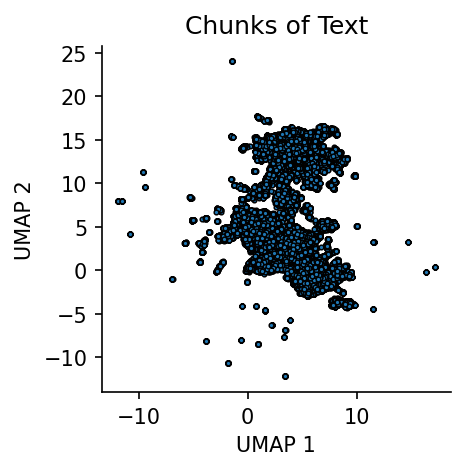

In [36]:
# visualize the prompt embeddings
plt.figure(figsize=(3, 3), dpi=150)
sns.scatterplot(data=udf,
                x='UMAP 1',
                y='UMAP 2',
                edgecolor='k',  # Set the edge color to black
                s=5,
                linewidth=0.7)  # Adjust the width of the edge

plt.title('Chunks of Text')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.xticks([])
#plt.yticks([])
sns.despine()
plt.show()

In [5]:
len(vectordb.get()['ids'])

62202

In [19]:
import umap
import random
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import chromadb
from langchain_chroma import Chroma
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from bert_score import BERTScorer
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
from langchain_text_splitters import CharacterTextSplitter
from langchain.docstore.document import Document
from langchain_chroma import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [5]:
len(vectordb)

62202

In [4]:
help(vectordb)

Help on Chroma in module langchain_community.vectorstores.chroma object:

class Chroma(langchain_core.vectorstores.VectorStore)
 |  Chroma(collection_name: 'str' = 'langchain', embedding_function: 'Optional[Embeddings]' = None, persist_directory: 'Optional[str]' = None, client_settings: 'Optional[chromadb.config.Settings]' = None, collection_metadata: 'Optional[Dict]' = None, client: 'Optional[chromadb.Client]' = None, relevance_score_fn: 'Optional[Callable[[float], float]]' = None) -> 'None'
 |  
 |  `ChromaDB` vector store.
 |  
 |  To use, you should have the ``chromadb`` python package installed.
 |  
 |  Example:
 |      .. code-block:: python
 |  
 |              from langchain_community.vectorstores import Chroma
 |              from langchain_community.embeddings.openai import OpenAIEmbeddings
 |  
 |              embeddings = OpenAIEmbeddings()
 |              vectorstore = Chroma("langchain_store", embeddings)
 |  
 |  Method resolution order:
 |      Chroma
 |      langchain